In [34]:
# %load 
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import seaborn as sns
from scipy import signal
from scipy.stats import sem
from scipy.io import wavfile
#path = "/home/afy9tp/Documents/my_first_project/build/familiarity/broadcast_cond/all_probe"
#path2 = "/home/afy9tp/Documents/my_first_project/wav/both/zlpbintc.wav"
#os.chdir(path)
#filelist = os.listdir(path)

#filelist

In [60]:
os.chdir("/home/afy9tp/Documents/my_first_project/build")
df = pd.read_csv('mean_spike_features.csv')
df2 = pd.read_csv('mean_spike_waveforms.csv')

df
# Filter rows where 'unit' contains 'P231', 'P232', or 'P233'
setA_df = df[df['unit'].str.contains(r'P231|P232|P233', regex=True)]

broadcast_df = df[df['unit'].str.contains(r'P225|P227|P208|210', regex=True)]
# Display the resulting dataframe
print(setA_df)

              unit   peak1_t      peak1_v   peak2_t      peak2_v       sd_v  \
0    P231_3_1_c556 -0.153333   233.373076  0.740000   300.086613  11.492444   
1    P231_3_1_c554 -0.086667    81.064201  0.440000   293.068404   6.241073   
2    P231_3_1_c551 -0.246667   578.456606  0.800000   372.354832  17.868534   
3    P231_3_1_c540 -0.166667   438.685928  0.646667   410.232869  11.124177   
4    P231_3_1_c549 -1.040000    71.880839  0.253333   336.167638  10.155765   
..             ...       ...          ...       ...          ...        ...   
340  P233_1_1_c130 -0.233333  1618.335352  1.053333  1071.217735  32.073495   
341  P233_1_1_c164 -0.133333   255.747014  0.200000  1109.108302   7.419035   
342  P233_1_1_c148 -0.286667   187.824945  0.680000   329.307874  14.233963   
344  P233_1_1_c124 -0.253333   296.610669  0.840000   195.596564  15.233216   
346  P233_1_1_c129 -0.093333  1174.368276  0.893333   306.649689  14.092738   

     sign     trough_v   ptratio   spike  
0    -1.

<function matplotlib.pyplot.show(close=None, block=None)>

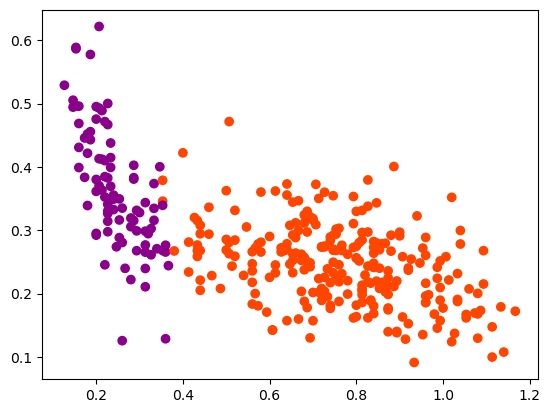

In [54]:
colors = setA_df['spike'].apply(lambda x: 'orangered' if x == 'wide' else 'darkmagenta')
plt.scatter(setA_df.peak2_t, setA_df.ptratio, c=colors)
plt.show
#plt.scatter(df.peak2_t,df.ptratio, c=df.spike=="wide")

<function matplotlib.pyplot.show(close=None, block=None)>

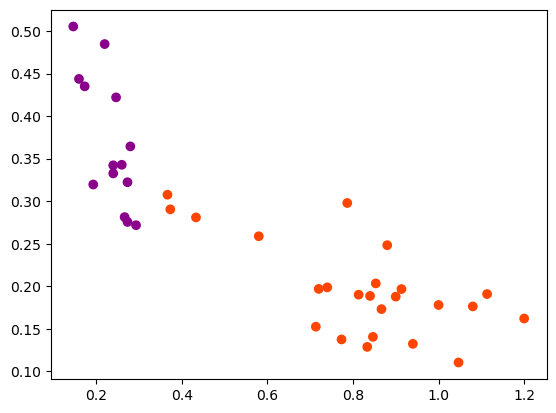

In [56]:
colors = broadcast_df['spike'].apply(lambda x: 'orangered' if x == 'wide' else 'darkmagenta')
plt.scatter(broadcast_df.peak2_t, broadcast_df.ptratio, c=colors)
plt.show
#plt.scatter(df.peak2_t,df.ptratio, c=df.spike=="wide")

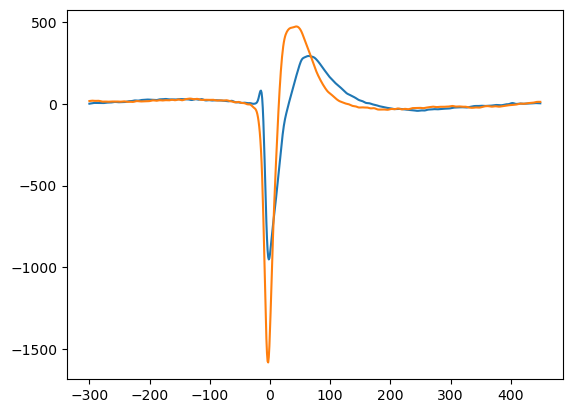

In [31]:
plt.plot(df2.time_samples, df2.P231_3_1_c554)
plt.plot(df2.time_samples, df2.P231_3_1_c541)

In [45]:
path = "/home/afy9tp/Documents/my_first_project/build/familiarity/setA_cond"
os.chdir(path)
filelist = os.listdir(path)
filelist

['P232_1_1_c307_spikes.h5',
 'P231_1_1_c282.pprox',
 'P232_2_1_c397_spikes.h5',
 'P231_2_2_c336.pprox',
 'P231_3_1_c471_spikes.h5',
 'P231_3_1_c161.pprox',
 'P233_2_2_c35_spikes.h5',
 'P233_2_1_c130_spikes.h5',
 'P233_2_1_c48_spikes.h5',
 'P233_2_2_c47.pprox',
 'P232_2_1_c262.pprox',
 'P233_1_1_c478.pprox',
 'P231_2_2_c210_spikes.h5',
 'P233_2_2_c295.pprox',
 'P231_3_1_c408_spikes.h5',
 'P231_3_1_c157.pprox',
 'P231_1_1_c122.pprox',
 'P231_3_1_c383.pprox',
 'P231_2_2_c100_spikes.h5',
 'P231_2_2_c448.pprox',
 'P231_3_1_c286_spikes.h5',
 'P231_2_2_c293.pprox',
 'P231_2_2_c456_spikes.h5',
 'P232_1_1_c195.pprox',
 'P231_1_1_c218.pprox',
 'P231_3_1_c486.pprox',
 'P233_2_2_c359.pprox',
 'P231_2_2_c215.pprox',
 'P232_2_1_c259.pprox',
 'P233_2_2_c57.pprox',
 'P231_3_1_c477_spikes.h5',
 'P231_1_1_c383_spikes.h5',
 'P232_2_1_c127_spikes.h5',
 'P231_1_1_c400_spikes.h5',
 'P231_3_1_c551_spikes.h5',
 'P232_2_1_c215.pprox',
 'P231_3_1_c141.pprox',
 'P231_3_1_c541.pprox',
 'P231_2_2_c179.pprox',
 'P2

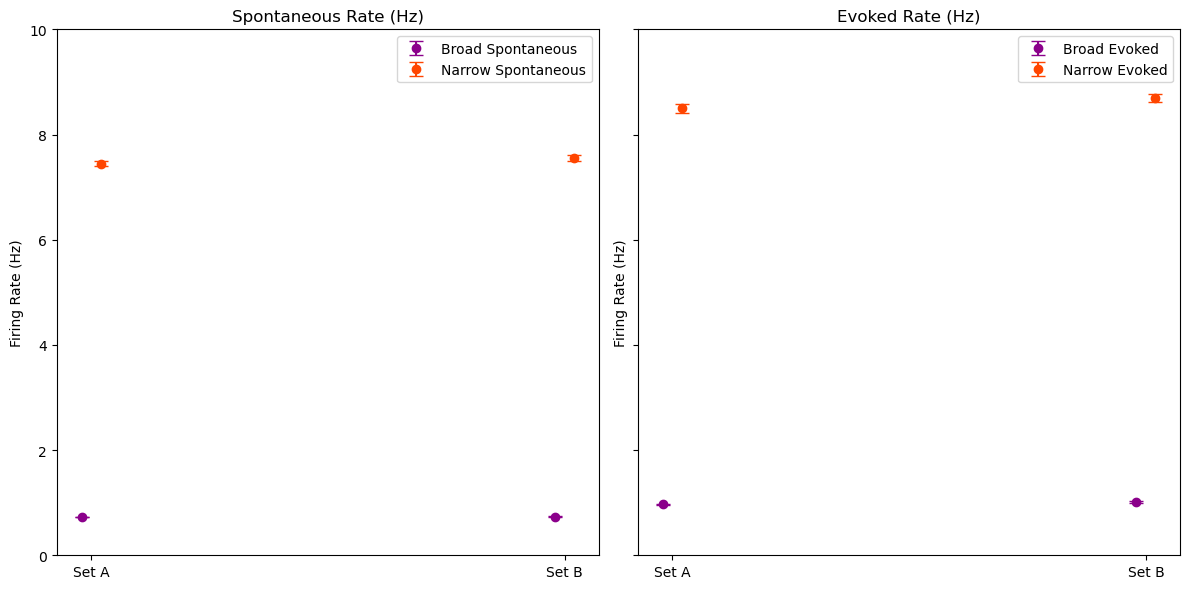

In [49]:
# Initialize recording_data
recording_data = pd.DataFrame()

# Process `.pprox` files and calculate firing rates
for file in filelist:
    if file.endswith('.pprox'):
        with open(file, 'r') as f:
            load = json.loads(f.read())
            temp_data = pd.json_normalize(load["pprox"]).rename(columns={"stimulus.name": "stimulus"})
            
            # Evoked firing rate calculation
            temp_data['evoked.average'] = temp_data.apply(
                lambda row: len([event for event in row['events'] if row['stimulus.interval'][0] <= event <= row['stimulus.interval'][1]]) 
                            / (row['stimulus.interval'][1] - row['stimulus.interval'][0]) if row['stimulus.interval'] else None, axis=1)

            # Spontaneous firing rate calculation
            def spontaneous_firing_rate(row):
                if row['events'] is None or row['stimulus.interval'] is None:
                    return None
                stimulus_start, stimulus_end = row['stimulus.interval']
                recording_start, recording_end = row['interval']
                spontaneous_time = (stimulus_start - recording_start) + (recording_end - stimulus_end)
                spontaneous_events = sum(event < stimulus_start or event > stimulus_end for event in row['events'])
                return spontaneous_events / spontaneous_time if spontaneous_time > 0 else None

            temp_data['spontaneous.average'] = temp_data.apply(spontaneous_firing_rate, axis=1)
            temp_data['file_name'] = file.replace('.pprox', '')
            recording_data = pd.concat([recording_data, temp_data], ignore_index=True)

# Classify spiking type based on 'spike' column in df
recording_data['spiking_type'] = recording_data['file_name'].map(
    filtered_df.set_index('unit')['spike']
)

# Define Set A and Set B
setA = recording_data[recording_data['stimulus'].isin([
    '3bwq3854', 'xnfz0r9p', '5aty45r1', 'xy3p0uks', 'cb9mtrj8', 'z4m8agwf',
    'cpexstgo', '861oyj2q', 'cur78zb1', 'zp7p8vly', 'em72q8p6', 'es5t309t',
    'g1zsf1dk', 'h66ditsp', 'hnm7p9sl', 'jitatsly', 'jq1t7gmt', 'kty6wjl0',
    'o0u0241g', 'p6mo3g58', 'sswgwoc2', 'sy1byl2d', 'uy9sl5vm', '7y9z5kki', 
    'wc5cw238'
])]
setB = recording_data[recording_data['stimulus'].isin([
    '0q00ufdg', '203gfy9n', '4hhv8qsd', '67k2z1kq', '9sz7s3vn', 'gx1qftos',
    'hj3u2rd8', 'jva85w5a', 'rj7xeuca', 'tfgnc7xv', 'tfje2xbr', 'uz30xwjv',
    'vie0406q', 'vl7jp867', 'zlpbintc', '156k256n', 'ak5j7ndy', 'jk05a1au',
    'qfufqw8b', 'xd8kyjt9', '8qlj3m9o', '90eios3z', 'ermxcgde', 'naax0jij',
    'vtcu0ccv'
])]

# Helper function to calculate mean and SEM safely
def calculate_rates(data, spiking_type, rate_type):
    subset = data[(data['spiking_type'] == spiking_type) & (data[rate_type].notna())]
    if not subset.empty:
        mean_rate = np.nanmean(subset[rate_type])
        sem_rate = sem(subset[rate_type]) if len(subset[rate_type]) > 1 else np.nan
    else:
        mean_rate, sem_rate = np.nan, np.nan
    return mean_rate, sem_rate

# Prepare data for plotting
broad_spontaneous_mean_A, broad_spontaneous_sem_A = calculate_rates(setA, 'wide', 'spontaneous.average')
narrow_spontaneous_mean_A, narrow_spontaneous_sem_A = calculate_rates(setA, 'narrow', 'spontaneous.average')
broad_evoked_mean_A, broad_evoked_sem_A = calculate_rates(setA, 'wide', 'evoked.average')
narrow_evoked_mean_A, narrow_evoked_sem_A = calculate_rates(setA, 'narrow', 'evoked.average')

broad_spontaneous_mean_B, broad_spontaneous_sem_B = calculate_rates(setB, 'wide', 'spontaneous.average')
narrow_spontaneous_mean_B, narrow_spontaneous_sem_B = calculate_rates(setB, 'narrow', 'spontaneous.average')
broad_evoked_mean_B, broad_evoked_sem_B = calculate_rates(setB, 'wide', 'evoked.average')
narrow_evoked_mean_B, narrow_evoked_sem_B = calculate_rates(setB, 'narrow', 'evoked.average')

# Plot side-by-side with dots and error bars
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Define x positions for Set A and Set B
x_labels = ['Set A', 'Set B']
x = np.arange(len(x_labels))

# Plot spontaneous rates
ax[0].errorbar(x[0] - 0.02, broad_spontaneous_mean_A, yerr=broad_spontaneous_sem_A, fmt='o', color='darkmagenta', capsize=5, label="Broad Spontaneous")
ax[0].errorbar(x[0] + 0.02, narrow_spontaneous_mean_A, yerr=narrow_spontaneous_sem_A, fmt='o', color='orangered', capsize=5, label="Narrow Spontaneous")
ax[0].errorbar(x[1] - 0.02, broad_spontaneous_mean_B, yerr=broad_spontaneous_sem_B, fmt='o', color='darkmagenta', capsize=5)
ax[0].errorbar(x[1] + 0.02, narrow_spontaneous_mean_B, yerr=narrow_spontaneous_sem_B, fmt='o', color='orangered', capsize=5)
ax[0].set_xticks(x)
ax[0].set_xticklabels(x_labels)
ax[0].set_ylabel("Firing Rate (Hz)")
ax[0].set_title("Spontaneous Rate (Hz)")
ax[0].set_ylim(0, 10)  # Set y-axis limits
ax[0].legend()

# Plot evoked rates
ax[1].errorbar(x[0] - 0.02, broad_evoked_mean_A, yerr=broad_evoked_sem_A, fmt='o', color='darkmagenta', capsize=5, label="Broad Evoked")
ax[1].errorbar(x[0] + 0.02, narrow_evoked_mean_A, yerr=narrow_evoked_sem_A, fmt='o', color='orangered', capsize=5, label="Narrow Evoked")
ax[1].errorbar(x[1] - 0.02, broad_evoked_mean_B, yerr=broad_evoked_sem_B, fmt='o', color='darkmagenta', capsize=5)
ax[1].errorbar(x[1] + 0.02, narrow_evoked_mean_B, yerr=narrow_evoked_sem_B, fmt='o', color='orangered', capsize=5)
ax[1].set_xticks(x)
ax[1].set_xticklabels(x_labels)
ax[1].set_ylabel("Firing Rate (Hz)")
ax[1].set_title("Evoked Rate (Hz)")
ax[1].set_ylim(0, 10)  # Set y-axis limits
ax[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [61]:
path = "/home/afy9tp/Documents/my_first_project/build/familiarity/broadcast_cond/all_probe"
os.chdir(path)
filelist = os.listdir(path)
filelist

['P227_2_1_c143_spikes.h5',
 'P227_3_1_c8_spikes.h5',
 'P227_2_1_c185.pprox',
 'P208_3_1_c32_spikes.h5',
 'P210_2_1_c108.pprox',
 'P225_1_1_c128_spikes.h5',
 'P210_2_1_c49_spikes.h5',
 'P227_1_1_c182_spikes.h5',
 'P227_3_1_c55.pprox',
 'P227_1_1_c41.pprox',
 'P225_2_1_c71_spikes.h5',
 'P225_1_1_c70_spikes.h5',
 'P227_1_1_c188_spikes.h5',
 'P227_2_1_c173_spikes.h5',
 'P208_3_1_c71_spikes.h5',
 'P210_3_1_c89.pprox',
 'P227_3_1_c8.pprox',
 'P227_1_1_c94_spikes.h5',
 'P227_1_1_c75.pprox',
 'P210_3_1_c61.pprox',
 'P225_1_1_c148.pprox',
 'P227_2_1_c176_spikes.h5',
 'P227_1_1_c160.pprox',
 'P210_3_1_c61_spikes.h5',
 'P227_3_1_c89.pprox',
 'P210_3_1_c24_spikes.h5',
 'P227_3_1_c77.pprox',
 'P227_3_1_c27.pprox',
 'P210_3_1_c49.pprox',
 'P227_2_1_c141.pprox',
 'P227_3_1_c77_spikes.h5',
 'P210_3_1_c49_spikes.h5',
 'P208_3_1_c118_spikes.h5',
 'P225_1_1_c128.pprox',
 'P227_1_1_c182.pprox',
 'P225_2_1_c75.pprox',
 'P227_3_1_c27_spikes.h5',
 'P210_2_1_c111.pprox',
 'P227_3_1_c51_spikes.h5',
 'P210_3_1

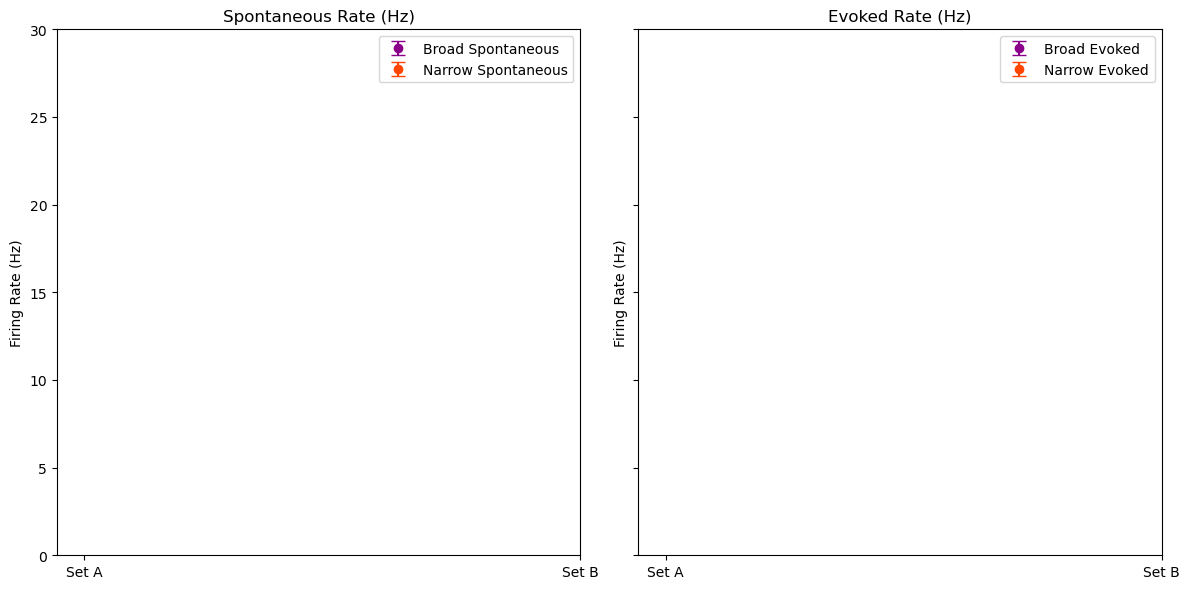

In [64]:
# Initialize recording_data
recording_data = pd.DataFrame()

# Process `.pprox` files and calculate firing rates
for file in filelist:
    if file.endswith('.pprox'):
        with open(file, 'r') as f:
            load = json.loads(f.read())
            temp_data = pd.json_normalize(load["pprox"]).rename(columns={"stimulus.name": "stimulus"})
            
            # Evoked firing rate calculation
            temp_data['evoked.average'] = temp_data.apply(
                lambda row: len([event for event in row['events'] if row['stimulus.interval'][0] <= event <= row['stimulus.interval'][1]]) 
                            / (row['stimulus.interval'][1] - row['stimulus.interval'][0]) if row['stimulus.interval'] else None, axis=1)

            # Spontaneous firing rate calculation
            def spontaneous_firing_rate(row):
                if row['events'] is None or row['stimulus.interval'] is None:
                    return None
                stimulus_start, stimulus_end = row['stimulus.interval']
                recording_start, recording_end = row['interval']
                spontaneous_time = (stimulus_start - recording_start) + (recording_end - stimulus_end)
                spontaneous_events = sum(event < stimulus_start or event > stimulus_end for event in row['events'])
                return spontaneous_events / spontaneous_time if spontaneous_time > 0 else None

            temp_data['spontaneous.average'] = temp_data.apply(spontaneous_firing_rate, axis=1)
            temp_data['file_name'] = file.replace('.pprox', '')
            recording_data = pd.concat([recording_data, temp_data], ignore_index=True)

# Classify spiking type based on 'spike' column in df
recording_data['spiking_type'] = recording_data['file_name'].map(
    filtered_df.set_index('unit')['spike']
)

# Define Set A and Set B
setA = recording_data[recording_data['stimulus'].isin([
    '3bwq3854', 'xnfz0r9p', '5aty45r1', 'xy3p0uks', 'cb9mtrj8', 'z4m8agwf',
    'cpexstgo', '861oyj2q', 'cur78zb1', 'zp7p8vly', 'em72q8p6', 'es5t309t',
    'g1zsf1dk', 'h66ditsp', 'hnm7p9sl', 'jitatsly', 'jq1t7gmt', 'kty6wjl0',
    'o0u0241g', 'p6mo3g58', 'sswgwoc2', 'sy1byl2d', 'uy9sl5vm', '7y9z5kki', 
    'wc5cw238'
])]
setB = recording_data[recording_data['stimulus'].isin([
    '0q00ufdg', '203gfy9n', '4hhv8qsd', '67k2z1kq', '9sz7s3vn', 'gx1qftos',
    'hj3u2rd8', 'jva85w5a', 'rj7xeuca', 'tfgnc7xv', 'tfje2xbr', 'uz30xwjv',
    'vie0406q', 'vl7jp867', 'zlpbintc', '156k256n', 'ak5j7ndy', 'jk05a1au',
    'qfufqw8b', 'xd8kyjt9', '8qlj3m9o', '90eios3z', 'ermxcgde', 'naax0jij',
    'vtcu0ccv'
])]

# Helper function to calculate mean and SEM safely
def calculate_rates(data, spiking_type, rate_type):
    subset = data[(data['spiking_type'] == spiking_type) & (data[rate_type].notna())]
    if not subset.empty:
        mean_rate = np.nanmean(subset[rate_type])
        sem_rate = sem(subset[rate_type]) if len(subset[rate_type]) > 1 else np.nan
    else:
        mean_rate, sem_rate = np.nan, np.nan
    return mean_rate, sem_rate

# Prepare data for plotting
broad_spontaneous_mean_A, broad_spontaneous_sem_A = calculate_rates(setA, 'wide', 'spontaneous.average')
narrow_spontaneous_mean_A, narrow_spontaneous_sem_A = calculate_rates(setA, 'narrow', 'spontaneous.average')
broad_evoked_mean_A, broad_evoked_sem_A = calculate_rates(setA, 'wide', 'evoked.average')
narrow_evoked_mean_A, narrow_evoked_sem_A = calculate_rates(setA, 'narrow', 'evoked.average')

broad_spontaneous_mean_B, broad_spontaneous_sem_B = calculate_rates(setB, 'wide', 'spontaneous.average')
narrow_spontaneous_mean_B, narrow_spontaneous_sem_B = calculate_rates(setB, 'narrow', 'spontaneous.average')
broad_evoked_mean_B, broad_evoked_sem_B = calculate_rates(setB, 'wide', 'evoked.average')
narrow_evoked_mean_B, narrow_evoked_sem_B = calculate_rates(setB, 'narrow', 'evoked.average')

# Plot side-by-side with dots and error bars
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Define x positions for Set A and Set B
x_labels = ['Set A', 'Set B']
x = np.arange(len(x_labels))

# Plot spontaneous rates
ax[0].errorbar(x[0] - 0.02, broad_spontaneous_mean_A, yerr=broad_spontaneous_sem_A, fmt='o', color='darkmagenta', capsize=5, label="Broad Spontaneous")
ax[0].errorbar(x[0] + 0.02, narrow_spontaneous_mean_A, yerr=narrow_spontaneous_sem_A, fmt='o', color='orangered', capsize=5, label="Narrow Spontaneous")
ax[0].errorbar(x[1] - 0.02, broad_spontaneous_mean_B, yerr=broad_spontaneous_sem_B, fmt='o', color='darkmagenta', capsize=5)
ax[0].errorbar(x[1] + 0.02, narrow_spontaneous_mean_B, yerr=narrow_spontaneous_sem_B, fmt='o', color='orangered', capsize=5)
ax[0].set_xticks(x)
ax[0].set_xticklabels(x_labels)
ax[0].set_ylabel("Firing Rate (Hz)")
ax[0].set_title("Spontaneous Rate (Hz)")
ax[0].set_ylim(0, 30)  # Set y-axis limits
ax[0].legend()

# Plot evoked rates
ax[1].errorbar(x[0] - 0.02, broad_evoked_mean_A, yerr=broad_evoked_sem_A, fmt='o', color='darkmagenta', capsize=5, label="Broad Evoked")
ax[1].errorbar(x[0] + 0.02, narrow_evoked_mean_A, yerr=narrow_evoked_sem_A, fmt='o', color='orangered', capsize=5, label="Narrow Evoked")
ax[1].errorbar(x[1] - 0.02, broad_evoked_mean_B, yerr=broad_evoked_sem_B, fmt='o', color='darkmagenta', capsize=5)
ax[1].errorbar(x[1] + 0.02, narrow_evoked_mean_B, yerr=narrow_evoked_sem_B, fmt='o', color='orangered', capsize=5)
ax[1].set_xticks(x)
ax[1].set_xticklabels(x_labels)
ax[1].set_ylabel("Firing Rate (Hz)")
ax[1].set_title("Evoked Rate (Hz)")
ax[1].set_ylim(0, 30)  # Set y-axis limits
ax[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [63]:
recording_data

,events,offset,index,interval,stimulus,stimulus.interval,recording.entry,recording.start,recording.end,evoked.average,spontaneous.average,file_name,spiking_type
0,"[-0.7808333333333334, -0.7731, -0.758266666666...",2.838933,0,"[-1.0, 5.687433333333333]",zlpbintc,"[0.0, 3.1892]",0,55168,255791,0.313558,2.286869,P227_2_1_c185,NaN
1,"[0.019233333333333335, 0.5554333333333333, 1.2...",9.526367,1,"[-1.0, 4.9443]",tfje2xbr,"[0.0, 2.899966666666667]",0,255791,434120,1.034495,1.313917,P227_2_1_c185,NaN
2,"[-0.6653333333333333, -0.5739333333333333, -0....",15.470667,2,"[-1.0, 3.8297666666666665]",9sz7s3vn,"[0.0, 1.82]",0,434120,579013,1.098901,0.996755,P227_2_1_c185,NaN
3,"[0.4206666666666667, 1.1999666666666666, 1.250...",20.300433,3,"[-1.0, 4.2013]",g1zsf1dk,"[0.0, 2.2199666666666666]",0,579013,735052,2.702743,0.335420,P227_2_1_c185,NaN
4,"[-0.5891666666666666, 3.628833333333333, 3.749...",25.501733,4,"[-1.0, 4.5728333333333335]",es5t309t,"[0.0, 2.371966666666667]",0,735052,902237,0.000000,3.124154,P227_2_1_c185,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,[],2744.652067,495,"[-1.0, 4.2013]",o0u0241g,"[0.0, 2.069]",0,82309562,82465601,0.000000,0.000000,P210_2_1_c89,NaN
26996,"[1.1401666666666668, 1.7671333333333332, 3.069...",2749.853367,496,"[-1.0, 6.0589]",wc5cw238,"[0.0, 3.8949666666666665]",0,82465601,82677368,0.770225,0.948187,P210_2_1_c89,NaN
26997,[],2756.912267,497,"[-1.0, 4.572866666666667]",7wlf4788,"[0.0, 2.3749666666666664]",0,82677368,82844554,0.000000,0.000000,P210_2_1_c89,NaN
26998,"[0.12923333333333334, 0.14866666666666667, 0.4...",2762.485133,498,"[-1.0, 4.2013]",vtcu0ccv,"[0.0, 2.1079666666666665]",0,82844554,83000593,1.423172,0.000000,P210_2_1_c89,NaN


 ...]

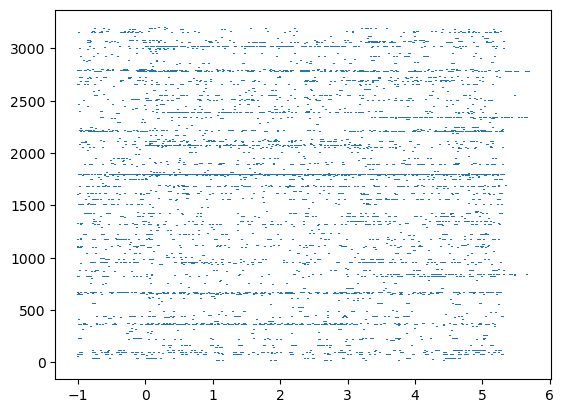

In [52]:
plt.eventplot(recording_data.query('stimulus == "zlpbintc"').events)

In [6]:
#separation of stimuli

setA = recording_data[recording_data['stimulus'].isin(['3bwq3854', 'xnfz0r9p', '5aty45r1', 'xy3p0uks', 'cb9mtrj8', 'z4m8agwf', 'cpexstgo', 'zlpbintc', 'cur78zb1', 'zp7p8vly', 'em72q8p6', 'es5t309t', 'g1zsf1dk', 'h66ditsp', 'hnm7p9sl', 'jitatsly', 'jq1t7gmt', 'kty6wjl0', 'o0u0241g', 'p6mo3g58', 'sswgwoc2', 'sy1byl2d', 'uy9sl5vm', 'v21ye3qk', 'wc5cw238'])]
setB = recording_data[recording_data['stimulus'].isin(['0q00ufdg', '67k2z1kq', '9sz7s3vn', 'jva85w5a', 'uz30xwjv', '156k256n', '7wlf4788', 'ak5j7ndy', 'naax0jij', 'vie0406q', '203gfy9n', '7y9z5kki', 'ermxcgde', 'qfufqw8b', 'vl7jp867', '3icv2vfp', '8qlj3m9o', 'gx1qftos', 'tfgnc7xv', 'vtcu0ccv', '4hhv8qsd', '90eios3z', 'jk05a1au', 'tfje2xbr', 'xd8kyjt9'])]

In [2]:
data = {}
averages = []

for file in filelist:
    if file.endswith('.pprox'):
        with open(file, 'r') as f:
            load = (json.loads(f.read()))
            recording_data = pd.json_normalize(load["pprox"]).rename(columns= {"stimulus.name": "stimulus"})
            count = recording_data['events'].apply(lambda x: len(x)).fillna(0)
            #result['average'] = pd.to_numeric(result['average'], errors='coerce')
            time = recording_data['interval'].apply(lambda x: x[1] - x[0])
            recording_data['average'] = count/time
            if len(recording_data) == 500:
                recording_name = os.path.splitext(file)[0]
                data[recording_name] = recording_data
            else: 
                print(file)

In [3]:
data = {}
averages = []

for file in filelist:
    if file.endswith('.pprox'):
        with open(file, 'r') as f:
            load = json.loads(f.read())
            recording_data = pd.json_normalize(load["pprox"]).rename(columns={"stimulus.name": "stimulus"})
            
            # Calculate evoked firing rate
            recording_data['evoked.average'] = recording_data.apply(
                lambda row: len([event for event in row['events'] if row['stimulus.interval'][0] <= event <= row['stimulus.interval'][1]]) 
                            / (row['stimulus.interval'][1] - row['stimulus.interval'][0]) if row['stimulus.interval'] else None,
                axis=1
            )
            
            # Calculate spontaneous firing rate
            def spontaneous_firing_rate(row):
                if row['events'] is None or row['stimulus.interval'] is None:
                    return None  # Handle cases where there's no data
                
                # Stimulus interval and total recording interval
                stimulus_start, stimulus_end = row['stimulus.interval']
                recording_start, recording_end = row['interval']
                
                # Calculate time outside of stimulus interval
                spontaneous_time = (stimulus_start - recording_start) + (recording_end - stimulus_end)
                
                # Count events outside of stimulus interval
                spontaneous_events = sum(event < stimulus_start or event > stimulus_end for event in row['events'])
                
                # Calculate spontaneous firing rate
                return spontaneous_events / spontaneous_time if spontaneous_time > 0 else None

            recording_data['spontaneous.average'] = recording_data.apply(spontaneous_firing_rate, axis=1)
            
            # Store in data dictionary if length is 500, else print file
            if len(recording_data) == 500:
                recording_name = os.path.splitext(file)[0]
                data[recording_name] = recording_data
                averages.extend(recording_data['spontaneous.average'].tolist())  # Store all spontaneous averages from this file
            else:
                print(f"{file} does not contain 500 entries.")

# Convert data dictionary to a single DataFrame, if needed
all_data = pd.concat(data.values(), keys=data.keys()).reset_index(level=1, drop=True).rename_axis("recording_name").reset_index()
averages_df = pd.DataFrame(averages, columns=["spontaneous.average"])

In [4]:
all_data

,recording_name,events,offset,index,interval,stimulus,stimulus.interval,recording.entry,recording.start,recording.end,evoked.average,spontaneous.average
0,P210_2_1_c108,[],2.823933,0,"[-1.0, 5.687366666666667]",zlpbintc,"[0.0, 3.1892]",0,54718,255339,0.000000,0.000000
1,P210_2_1_c108,[],9.511300,1,"[-1.0, 4.9444]",tfje2xbr,"[0.0, 2.899966666666667]",0,255339,433671,0.000000,0.000000
2,P210_2_1_c108,[1.4111666666666667],15.455700,2,"[-1.0, 3.8297333333333334]",9sz7s3vn,"[0.0, 1.82]",0,433671,578563,0.549451,0.000000
3,P210_2_1_c108,"[0.7425666666666667, 1.4233333333333333, 1.474...",20.285433,3,"[-1.0, 4.2013]",g1zsf1dk,"[0.0, 2.2199666666666666]",0,578563,734602,1.801829,0.335420
4,P210_2_1_c108,[3.4076333333333335],25.486733,4,"[-1.0, 4.572866666666667]",es5t309t,"[0.0, 2.371966666666667]",0,734602,901788,0.000000,0.312412
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,P210_2_1_c89,[],2744.652067,495,"[-1.0, 4.2013]",o0u0241g,"[0.0, 2.069]",0,82309562,82465601,0.000000,0.000000
8996,P210_2_1_c89,"[1.1401666666666668, 1.7671333333333332, 3.069...",2749.853367,496,"[-1.0, 6.0589]",wc5cw238,"[0.0, 3.8949666666666665]",0,82465601,82677368,0.770225,0.948187
8997,P210_2_1_c89,[],2756.912267,497,"[-1.0, 4.572866666666667]",7wlf4788,"[0.0, 2.3749666666666664]",0,82677368,82844554,0.000000,0.000000
8998,P210_2_1_c89,"[0.12923333333333334, 0.14866666666666667, 0.4...",2762.485133,498,"[-1.0, 4.2013]",vtcu0ccv,"[0.0, 2.1079666666666665]",0,82844554,83000593,1.423172,0.000000


EXTRA